#### **Linear Discriminant Analysis (LDA)**
- **PCA is an unsupervised** while **LDA is a supervised dimensionality reduction technique**.
- PCA has no concern with the class labels. In simple words, PCA summarizes the feature set without relying on the output. PCA tries to find the directions of the maximum variance in the dataset.
- In a large feature set, there are many features that are merely duplicate of the other features or have a high correlation with the other features. Such features are basically redundant and can be ignored.
- The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features
- In other words feature set with maximum variance between the features. Since the variance between the features doesn't depend upon the output,therefore PCA doesn't take the output labels into account.

Unlike PCA, LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes.
- LDA tries to find a decision boundary around each cluster of a class.
- It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible.
- The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.

#### **Assumptions of LDA**
1. Each feature (variable or dimension or attribute) in the dataset is a gaussian distribution. In other words, each feature in the dataset is shaped like a bell-shaped curve.
2. Each feature has the same variance, the value of each feature varies around the mean with the same amount on average.
3. Each feature is assumed to be randomly sampled.
4. Lack of multicollinearity in independent features. Increase in correlations between independent features and the power of prediction decreases.

#### **How LDA works**
1. Compute the **d-dimensional mean vectors** for the different classes from the dataset.
2. Compute the **scatter matrices** (in-between-class and within-class scatter matrix).
3. Compute the **eigenvectors,e** (e1,e2,...,ed) and **corresponding eigenvalues,λ** (λ1,λ2,...,λd) for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and **choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W** (where every column represents an eigenvector).
5. Use this **d × k eigenvector matrix** to transform the samples onto the new subspace.
6. This can be summarized by the matrix multiplication: Y= X × W

  where, X is a n × d -dimensional matrix representing the n samples and
  y are the transformed n × k -dimensional samples in the new subspace

  In other word, obtains the new features (i.e. linear discriminants) by taking the dot product of the data and the matrix (created in Step 5)



#### **How to Prepare the data for LDA**

1. **Outlier Treatment:** Outliers from the data should be removed, outliers will introduce skewness and in-turn computations of mean and variance will be influenced and finally, that will have an impact on LDA computations.

2. **Equal Variance:** Standardization of input data, such that it has a mean 0 and a standard deviation of 1.

3. **Gaussian distribution:** Univariate analysis of each input feature and if they do not exhibit the gaussian distribution transform them to look like Gaussian distribution(log and root for exponential distributions).

#### **Aim of LDA**

**Minimize the Inter-Class Variability:** Inter-class variability refers to including as many similar points as possible in one class. This ensures less number of misclassifications.

**Maximize the Distance Between the Mean of Classes:** The classes’ mean is placed as far as possible to ensure high confidence during prediction.

#### **Linear Discriminant Analysis (LDA)**
- It searches for the projection of a dataset which maximizes the *between class scatter to within class scatter* $\frac{S_B}{S_W}$ ratio of this projected dataset.
- The goal is to project/transform a dataset  using a transformation matrix  such that the ratio of between class scatter to within class scatter of the transformed dataset is maximized. Hence our goal is to find the transformation matrix that accomplishes this.

In Fisher's terms:
- Find the linear combination such that the between class variance is maximized relative to the within class variance.
- LDA aims to find the projection of maximum separability. But slowly. Consider the following illustration which shows a dataset consisting of three different classes. We now want to have the within and between class scatter of this dataset.

**Importing required libraries**

In [ ]:
# Libraries
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

**Load Dataset**

In [ ]:
# Iris Dataset for Classification
iris = datasets.load_iris()
# Convert to DataFrame
iris_pd = pd.DataFrame(iris.data)
# Feature Name
iris_pd.columns = iris.feature_names
# Target Variable
iris_pd["Class"] = iris.target
dataset = iris_pd
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
dataset.shape

(150, 5)

**Data Preprocessing**

In [ ]:
# Loading the dataset and separating the dependent variable and independent variable in variables
# named as “dependentVaraible” and “independentVariables” respectively
independentVariables = dataset.iloc[:, 0:4].values
dependentVariables = dataset['Class'].values

**Label Encoding**

In [ ]:
# We did Label Encoding because we have label 0
# So many times when 0 get multiplied answer varies
# Therefore we added +1, 0 became 1, 1 became 2, 2 became 3
enc = LabelEncoder()
label_encoder = enc.fit(dependentVariables)
dependentVariables = label_encoder.transform(dependentVariables) + 1
label_dict = {1: '0', 2: '1', 3:'2'}

**Computing the d-dimensional mean vectors**

In [ ]:
# Here, we will start off with a simple computation of the mean vectors mmi, (i=0,1,2) of the 3 different flower classes:
# Mean vector consists of the means of each variable

np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
  mean_vectors.append(np.mean(independentVariables[dependentVariables==cl], axis=0))
  print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))


Mean Vector class 1: [5.006 3.428 1.462 0.246]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



In [ ]:
# Another way to check Mean Vector of Target Class. i.e, "Class"
dataset.groupby(by=["Class"]).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Class,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


**Computing the Scatter Matrices**

**within-class**

In [ ]:
# Now, we will compute the two 4x4-dimensional matrices: The within-class and the between-class scatter matrix.

S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in independentVariables[dependentVariables == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


**between-class**

In [ ]:
overall_mean = np.mean(independentVariables, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):
    n = independentVariables[dependentVariables==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


**Eigen Value And Eigen Vector for within-class Scatter Matrix and between-class Scatter Matrix**

In [ ]:
# Find Eigen Value And Eigen Vector for within-class Scatter Matrix and between-class Scatter Matrix
# It's 4*4 so we will have 4 eigen values and 4 corresponding matrix

eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.2087]
 [-0.3862]
 [ 0.554 ]
 [ 0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]
Eigenvalue 3: -2.89e-15

Eigenvector 4: 
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]
Eigenvalue 4: -2.89e-15


**Sorting the eigenvectors by decreasing eigenvalues**

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.191929198278025
0.28539104262306647
3.7355530009793716e-15
3.7355530009793716e-15


**Explained Variances**

In [ ]:
# “explained variance” as percentage:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


**Inference**
* The first eigenpair is by far the most informative one, and we won’t loose much information if we would form a 1D-feature spaced based on this eigenpair.

**Choosing k eigenvectors with the largest eigenvalues**

In [ ]:
# After sorting the eigenpairs by decreasing eigenvalues,
# it is now time to construct our d×k-dimensional eigenvector matrix WW
# here 4×2: based on the 2 most informative eigenpairs
# and thereby reducing the initial 4-dimensional feature space into a 2-dimensional feature subspace.

W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2087 -0.0065]
 [-0.3862 -0.5866]
 [ 0.554   0.2526]
 [ 0.7074 -0.7695]]


**Transforming the samples onto the new subspace**

In [ ]:
# In the last step, we use the 4×2-dimensional matrix W
# that we just computed to transform our samples onto the new subspace via the equation
# Y= X × W.
# where X is a n × d - dimensional matrix representing the n samples
# Y are the transformed n×k-dimensional samples in the new subspace.

X_lda = independentVariables.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."
print("New IRIS Dataset reduced to 2 Dimension (top 10 rows)")
print(X_lda[:10])

New IRIS Dataset reduced to 2 Dimension (top 10 rows)
[[-1.4992+0.j -1.8868+0.j]
 [-1.2644+0.j -1.5921+0.j]
 [-1.3553+0.j -1.7334+0.j]
 [-1.185 +0.j -1.6236+0.j]
 [-1.517 +0.j -1.9448+0.j]
 [-1.4086+0.j -2.2015+0.j]
 [-1.2855+0.j -1.9018+0.j]
 [-1.3843+0.j -1.8022+0.j]
 [-1.1214+0.j -1.5302+0.j]
 [-1.3183+0.j -1.5486+0.j]]


In [ ]:
# LDA Iris Dataset

data=pd.DataFrame(X_lda)
data['class']=dependentVariables
data.columns=["LD1","LD2","class"]
print("New LDA IRIS Dataset")
print(data.head())

New LDA IRIS Dataset
                  LD1                 LD2  class
0 -1.499210+0.000000j -1.886754+0.000000j      1
1 -1.264360+0.000000j -1.592143+0.000000j      1
2 -1.355253+0.000000j -1.733415+0.000000j      1
3 -1.184956+0.000000j -1.623588+0.000000j      1
4 -1.516956+0.000000j -1.944762+0.000000j      1


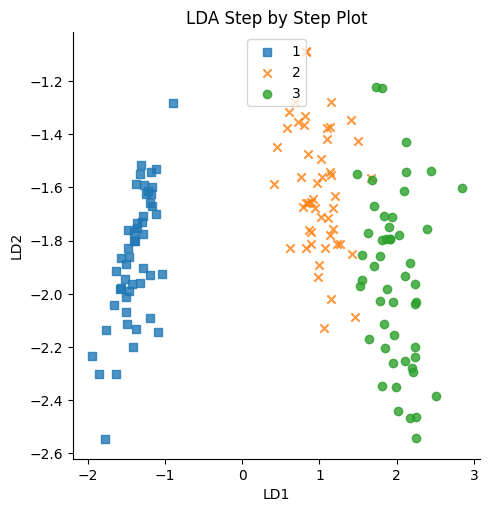

In [ ]:
# Plotting the LDA
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.title('LDA Step by Step Plot')
plt.show()

In [ ]:
# LDA Through Python
# Perform standard scaling on model features
scaler=StandardScaler()
X_std=scaler.fit_transform(independentVariables)

# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=2,solver='eigen')
lda

LinearDiscriminantAnalysis(n_components=2, solver='eigen')

In [ ]:
# LDA IRIS Dataset

X_train_lda = lda.fit_transform(X_std, dependentVariables)
data=pd.DataFrame(X_train_lda)
data['class']=dependentVariables
data.columns=["LD1","LD2","class"]
print("New LDA IRIS Dataset")
print(data.head())

New LDA IRIS Dataset
        LD1       LD2  class
0  8.143648  0.303471      1
1  7.201062 -0.794647      1
2  7.565869 -0.268079      1
3  6.882372 -0.677440      1
4  8.214873  0.519686      1


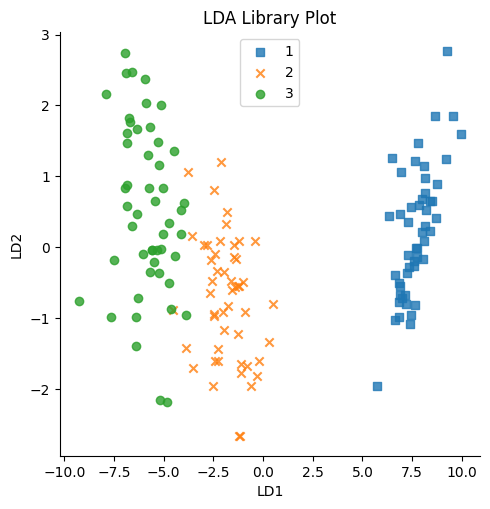

In [ ]:
# Plotting the LDA

markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.title('LDA Library Plot')
plt.show()

**Inference**
* Both Step by Step and Library gave similar plot
* Only the plot got flipped upside down
* And the scale got changed